# Import packages

In [1]:
# Reading/Writing Data
import os
import glob
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

# Pytorch
import torch 
from torch.utils.data import DataLoader, random_split

# Self-Defined Package
from SMAPDataset import SMAPDataset
from SMCNN import SMCNN
from SDLoss import calculate_pred_smap
from Preprocessing import random_spatial_sequence, collate_fn

C:\Users\jianer\anaconda3\envs\datamining\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Some Utility Functions

In [3]:
def same_seed(seed): 
    '''Fixes random number generator seeds for reproducibility.'''
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Configurations
`config` contains hyper-parameters for training and the path to save your model.

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 11611801,      # Your seed number, you can pick your lucky number. :)
    'is_train': True,
    'test_batch_size': 2195,
    'ati_rate': '70',
    'root': 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\DATASET\\SE',
    'model_save_dir': 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\DATASET\\SE\\OUTPUT\\MODELS\\CNN_FROM_UPSCALING'
}

In [5]:
# # Set seed for reproducibility
same_seed(config['seed'])

In [6]:
print(config['root'])
# 创建数据集
insitu_dataset = SMAPDataset(config['root'], ati_rate=config['ati_rate'], insitu_validation=False)
# 创建数据加载器
insitu_loader = DataLoader(insitu_dataset, batch_size=config['test_batch_size'], shuffle=False, collate_fn=collate_fn)

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70
***************************Load data path******************************
valid day sequence: ['2015104', '2015106', '2015114', '2015115', '2015117', '2015128', '2015130', '2015131', '2015136', '2015138', '2015141', '2015149', '2015154', '2015157', '2015160', '2015162', '2015163', '2015165', '2015171', '2015176', '2015186', '2015187', '2015189', '2015194', '2015195', '2015197', '2015200', '2015202', '2015203', '2015205', '2015208', '2015211', '2015213', '2015216', '2015221', '2015226', '2015229', '2015232', '2015234', '2015235', '2015237', '2015242', '2015243', '2015258', '2015259', '2015261', '2015267', '2015272', '2015275', '2015277', '2015280', '2015282', '2015283', '2015285', '2015288', '2015290', '2015291', '2015296', '2015325', '2015330', '2015333']
_______________________________2015104____________________________

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70\2015186\44.npy
_____________________________smap cell: 45_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\SMAP\2015186\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\TEXTURE\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\NDVI\GRID\2015186\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\SMAP\2015186\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70\2015186\45.npy
_____________________________smap cell: 46_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\SMAP\2015186\46.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\TEXTURE\46.npy
D:\1GRADUATED\paper\downscaling

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70\2015258\55.npy
_____________________________smap cell: 6_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\SMAP\2015258\6.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\TEXTURE\6.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\NDVI\GRID\2015258\6.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\SMAP\2015258\6.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70\2015258\6.npy
_____________________________smap cell: 7_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\SMAP\2015258\7.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\TEXTURE\7.npy
D:\1GRADUATED\paper\downscaling_data\Soi

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\NDVI\GRID\2015291\50.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\SMAP\2015291\50.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70\2015291\50.npy
_____________________________smap cell: 51_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\SMAP\2015291\51.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\TEXTURE\51.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\INPUT\NDVI\GRID\2015291\51.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\SMAP\2015291\51.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\SE\LABEL\ATI\GRID_70\2015291\51.npy
_____________________________smap cell: 52_____________________________
D:\1GRADUATED\paper\d

In [7]:
print(len(insitu_dataset))

985


In [8]:
import datetime

# The index of day start from 1
# day 从 1 开始
def date2day(date, fm="%Y-%m-%d"):
    date_object = datetime.datetime.strptime(date, fm)
    day_of_year = date_object.timetuple().tm_yday
    return day_of_year

def day2date(year, day):
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(day - 1)
    month = date.month
    day = date.day
    return date

In [9]:
def tester(test_loader, model, config, device):
    relu = torch.nn.ReLU(inplace=True)
#     criterion = ab_physics_loss
    model.eval()
    pred_pkg = {'date':[], 'smapid':[], 'a': [], 'b': [], 'smap': [], 'downscaling_id':[], 'downscaling_grid':[]}
    pred_list = np.zeros((len(test_loader), 2))
    
    for i, data_pkg in enumerate(test_loader):
        x = data_pkg['processed_data']
        label_data = data_pkg['label_data']
        meta_data = data_pkg['meta_data']
#         print(label_data)
#         print(meta_data)
        with torch.no_grad():
            pred_ab = model(x)
#             x, pred = x.to(device), pred.to(device)  
            
        # 计算 smap_downscaling，并将其保存在 pred_smap 中
        _, smap_downscaling = calculate_pred_smap(pred_ab, label_data)
        
        # 装袋数据
        pred_pkg['downscaling_grid'] = smap_downscaling
        pred_pkg['downscaling_id'] = [i for i in range(smap_downscaling.size(0))]
        pred_pkg['smap'] = np.asarray(label_data['smap'][:, 0])
        pred_pkg['a'] = pred_ab[:, 0]
        pred_pkg['b'] = pred_ab[:, 1]
        
        for i in pred_pkg['downscaling_id']:
            pred_pkg['date'].append(meta_data[i]['date'])
            pred_pkg['smapid'].append(int(meta_data[i]['smapid']))
        print(len(pred_pkg['date']), len(pred_pkg['smapid']), len(pred_pkg['a']), len(pred_pkg['b']), len(pred_pkg['smap']), len(pred_pkg['downscaling_id']))
    return pred_pkg

In [10]:
param_path = os.path.join(config['model_save_dir'], 'first.ckpt' )
print(insitu_dataset.get_input_shape(0))
model = SMCNN(input_channel=insitu_dataset.get_input_shape(0)[2]).to(device)
print(model)
model.load_state_dict(torch.load(param_path))
pred_pkg = tester(insitu_loader, model, config, device) 

(11, 11, 20)
SMCNN(
  (cnn): Sequential(
    (0): Conv2d(20, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3872, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
  )
)
985 985 985 985 985 985


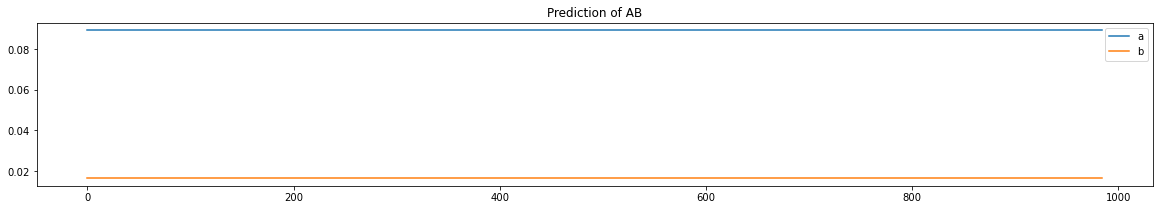

In [11]:
plt.figure(figsize=(20,3))
plt.plot(pred_pkg['a'], label='a')
plt.plot(pred_pkg['b'], label='b')
# 添加标题和标签
plt.title('Prediction of AB')
# plt.xlabel('Index of Model')
plt.legend()
plt.show()

In [12]:
selected_dict = {key: value for key, value in pred_pkg.items() if key not in ['downscaling_grid']}
df = pd.DataFrame(selected_dict)
df = df.sort_values(by='smapid', ascending=True, kind='stable')
df = df.sort_values(by='date', ascending=True, kind='stable')
df = df.reset_index(drop=True)
print(df)
df.info()

        date  smapid         a         b      smap  downscaling_id
0    2015104       1  0.089377  0.016391  0.153518               0
1    2015104       6  0.089377  0.016391  0.164281              12
2    2015104       7  0.089377  0.016391  0.169025              13
3    2015104       8  0.089377  0.016391  0.174040              14
4    2015104       9  0.089377  0.016391  0.179011              15
..       ...     ...       ...       ...       ...             ...
980  2015333      54  0.089377  0.016391  0.104842             976
981  2015333      55  0.089377  0.016391  0.101146             977
982  2015333      56  0.089377  0.016391  0.101434             978
983  2015333      57  0.089377  0.016391  0.109974             979
984  2015333      58  0.089377  0.016391  0.118791             980

[985 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --

In [13]:
for grid in df[df['date']=='2015187']['downscaling_id']:
    print(pred_pkg['downscaling_grid'][grid])

tensor([[ 0.2129,  0.2312,  0.2602,  0.2430,  0.2409,  0.2345,  0.2263,  0.2801,
          0.3270,  0.3158,  0.2991],
        [ 0.1530,  0.2599,  0.2829,  0.2681,  0.2572,  0.2325,  0.2256,  0.3025,
          0.3170,  0.3501,  0.3663],
        [ 0.3400,  0.3245,  0.3045,  0.2338,  0.2354,  0.2179,  0.2160,  0.3089,
          0.3395,  0.3860,  0.3668],
        [ 0.3041,  0.2922,  0.2723,  0.2542,  0.2202,  0.2186,  0.2599,  0.2926,
          0.3504,  0.3526,  0.3258],
        [ 0.2851,  0.2778,  0.2786,  0.2610,  0.2627,  0.3010,  0.2965,  0.3167,
          0.3511,  0.3592,  0.3606],
        [ 0.1662,  0.1877,  0.2021,  0.2738,  0.2779,  0.2492,  0.2692,  0.2190,
          0.2192,  0.3501,  0.3020],
        [ 0.1308,  0.1736,  0.1595,  0.1709,  0.1684,  0.1802,  0.1676,  0.1772,
          0.1509,  0.1817,  0.1711],
        [ 0.0991,  0.1671,  0.1694,  0.1653,  0.1600,  0.1580,  0.1415,  0.1367,
          0.1084,  0.1200,  0.1223],
        [ 0.0348,  0.1026,  0.1101,  0.1145,  0.1954,  0

In [14]:
df[df['date']=='2015187']

,date,smapid,a,b,smap,downscaling_id
299,2015187,1,0.089377,0.016391,0.203531,299
300,2015187,2,0.089377,0.016391,0.201729,310
301,2015187,3,0.089377,0.016391,0.200316,321
302,2015187,4,0.089377,0.016391,0.193260,332
303,2015187,5,0.089377,0.016391,0.185871,343
304,2015187,6,0.089377,0.016391,0.253735,353
305,2015187,7,0.089377,0.016391,0.241151,354
306,2015187,8,0.089377,0.016391,0.232040,355
307,2015187,9,0.089377,0.016391,0.236429,356
308,2015187,10,0.089377,0.016391,0.231437,300


##  按日期可视化降尺度结果

In [15]:
from osgeo import gdal
smapid_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\SMAP_Babao.tif'
smap_dataset = gdal.Open(smapid_root)
smapid_mat = []
for i in range(smap_dataset.RasterCount):

    # 获取当前波段
    band = smap_dataset.GetRasterBand(i+1)

    # 将波段数据读入 NumPy 数组
    smapid_mat = band.ReadAsArray()

    # 获取无数据值
#     nodata_value = band.GetNoDataValue()
#     将数据中的无数据值替换为np.nan
#     data[data == nodata_value] = np.nan
print(smapid_mat)

[[-128 -128    1    2    3    4    5 -128 -128 -128 -128 -128 -128]
 [   6    7    8    9   10   11   12   13 -128 -128 -128 -128 -128]
 [  14   15   16   17   18   19   20   21   22   23 -128 -128 -128]
 [  24   25   26   27   28   29   30   31   32   33   34   35 -128]
 [-128 -128   36   37   38   39   40   41   42   43   44   45   46]
 [-128 -128 -128 -128 -128 -128   47   48   49   50   51   52   53]
 [-128 -128 -128 -128 -128 -128 -128   54   55   56   57   58 -128]]


2015104


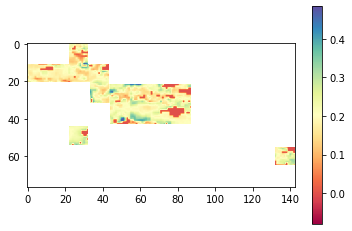

2015106


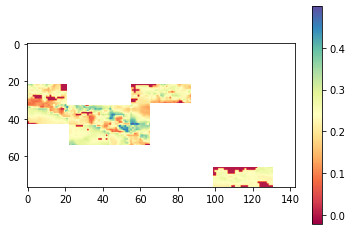

2015114


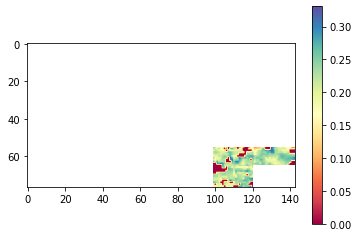

2015115


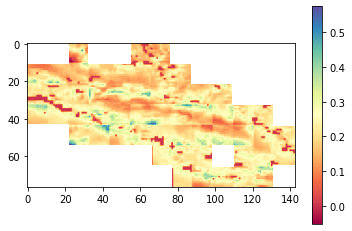

2015117


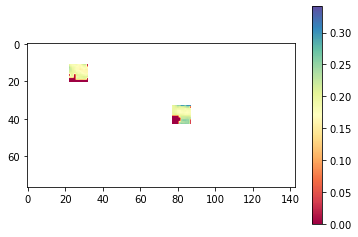

2015131


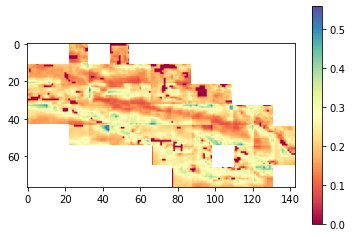

2015138


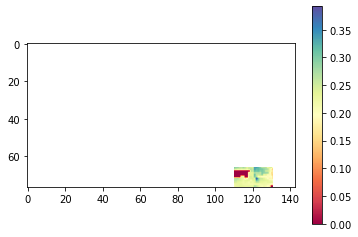

2015149


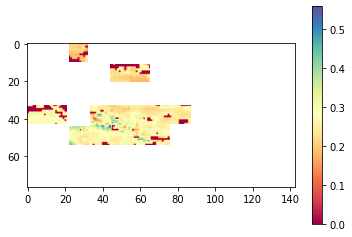

2015160


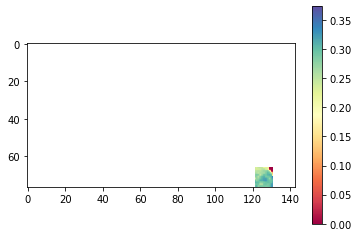

2015162


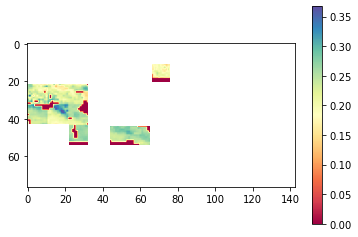

2015165


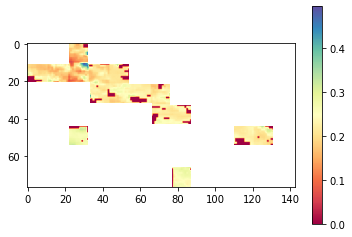

2015171


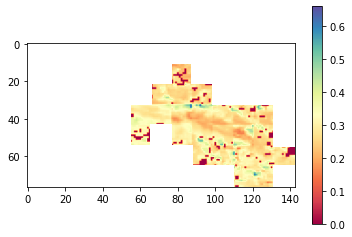

2015176


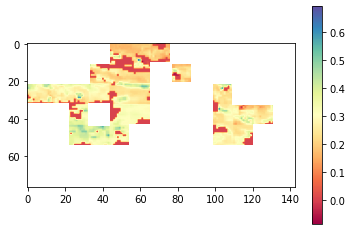

2015186


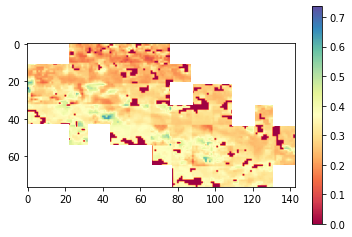

2015187


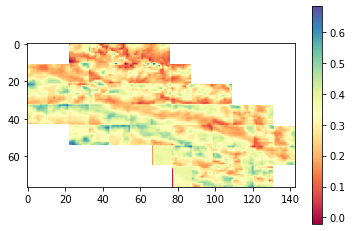

2015194


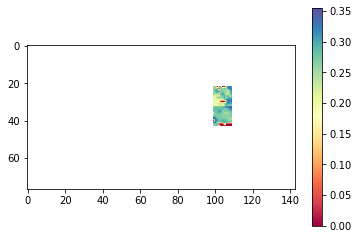

2015195


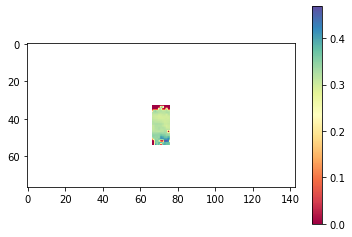

2015200


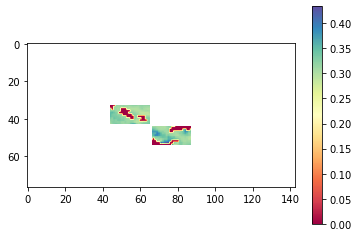

2015202


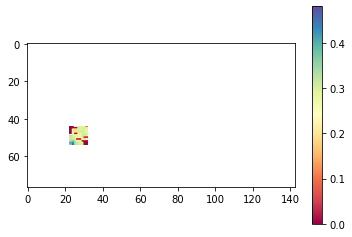

2015205


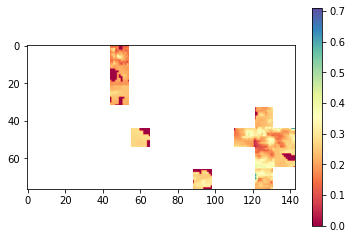

2015208


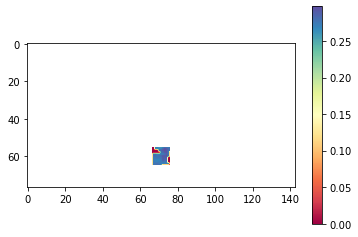

2015211


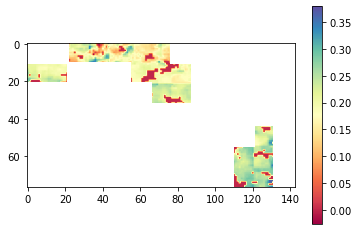

2015213


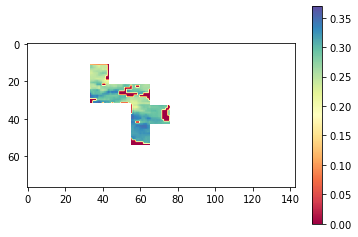

2015216


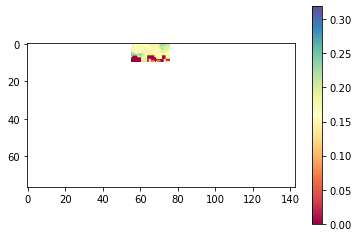

2015221


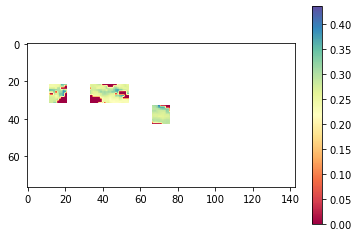

2015226


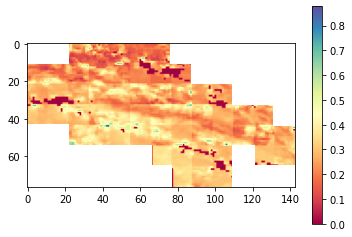

2015229


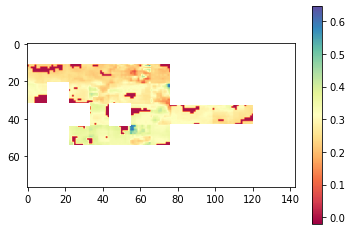

2015232


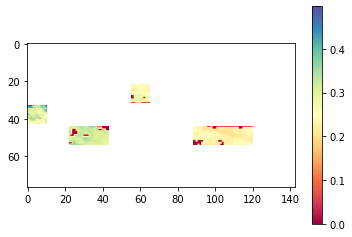

2015234


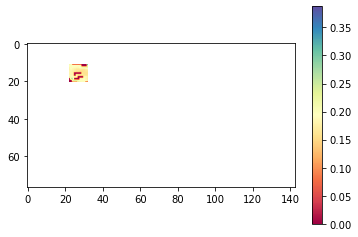

2015235


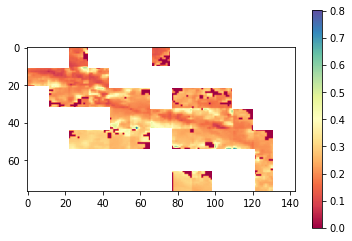

2015237


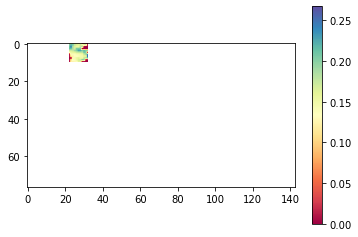

2015258


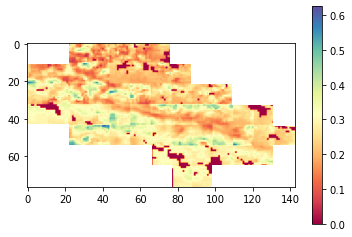

2015267


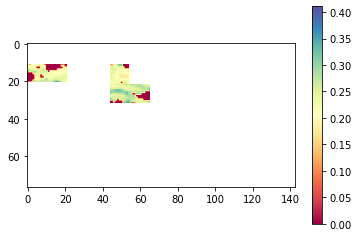

2015272


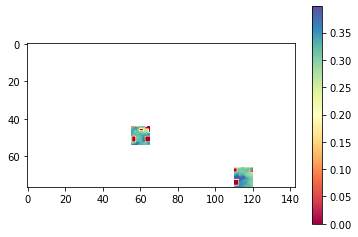

2015275


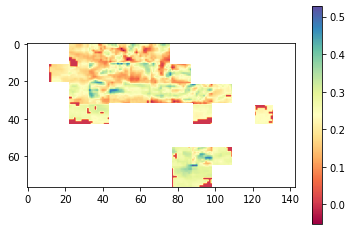

2015277


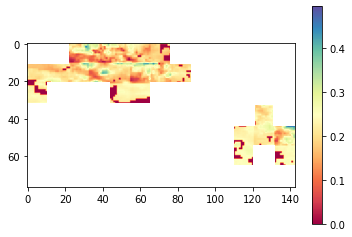

2015280


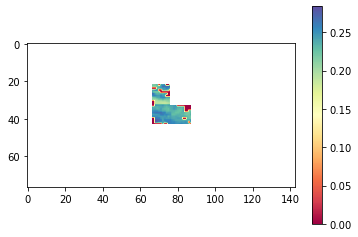

2015282


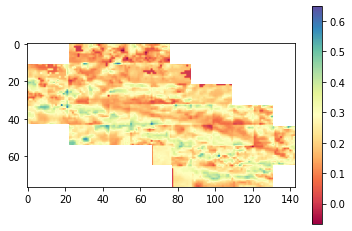

2015283


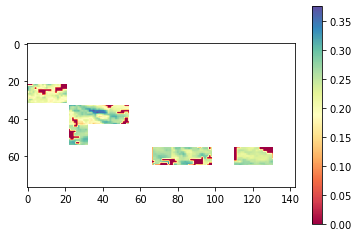

2015285


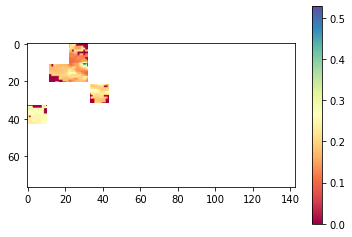

2015288


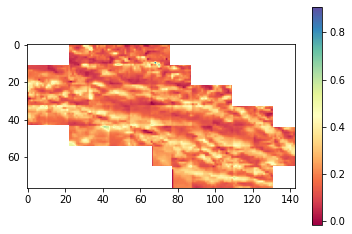

2015290


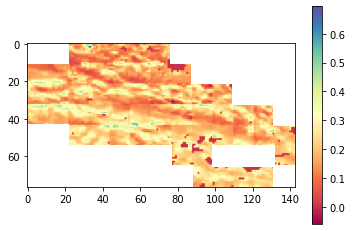

2015291


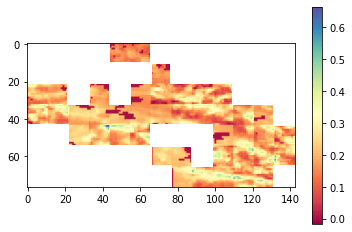

2015296


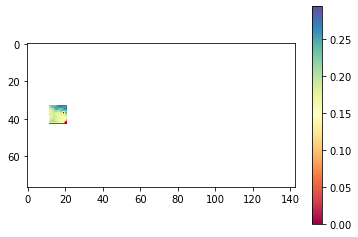

2015330


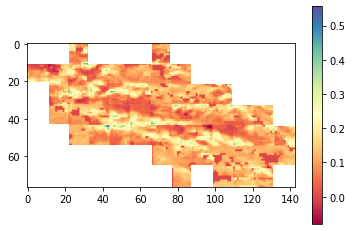

2015333


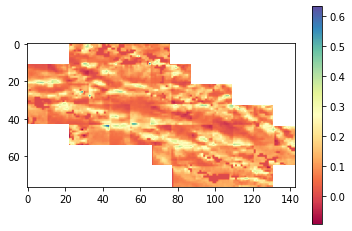

In [16]:
dates = df['date'].unique()
downscaling_grid = pred_pkg['downscaling_grid']

for date in dates:
    downscaling_array = np.ones((smapid_mat.shape[0]*11,smapid_mat.shape[1]*11))
    downscaling_array = downscaling_array * np.nan
    
    smapid = df[df['date']==date]['smapid']
    smapid_it = iter(smapid)
    cur_smapid = next(smapid_it)
    
    downscaling_id = df[df['date']==date]['downscaling_id']
    downscaling_it = iter(downscaling_id)
    cur_downscaling = next(downscaling_it)
    
    print(date)
    for i in range(smapid_mat.shape[0]):
        for j in range(smapid_mat.shape[1]):
            if(smapid_mat[i][j]==cur_smapid):
                downscaling_array[i*11:(i+1)*11, j*11:(j+1)*11] = downscaling_grid[cur_downscaling]
                try:
                    cur_smapid = next(smapid_it)
                    cur_downscaling = next(downscaling_it)
                except StopIteration:
                    break
    plt.imshow(downscaling_array, cmap='Spectral')
    plt.colorbar()
    plt.show()